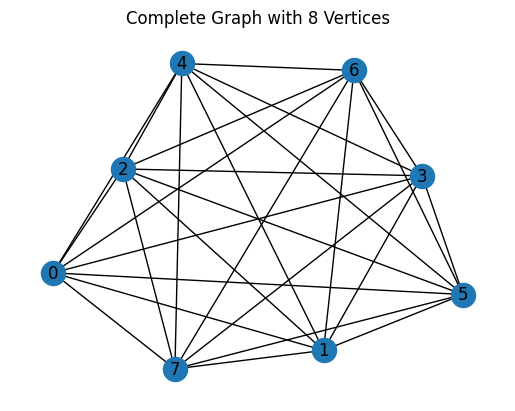

In [1]:
# generate complete graph witih networkx
import networkx as nx
import matplotlib.pyplot as plt

# create graph with 8 vertices
G = nx.complete_graph(8)

# make layout nice
pos = nx.spring_layout(G)

# add title
plt.title("Complete Graph with 8 Vertices")

# draw graph
nx.draw(G, with_labels=True)
plt.show()


### Fitness function: technical details

In GRDN.AI the fitness of a garden configuration, $G$, which contains all plant beds in the garden, is calculated as follows:

$$
\text{Fitness}(G) = \sum_{\text{PlantBed} \in G} \left( \sum_{\substack{i,j \in \text{PlantBed} \\ i \neq j}} \text{Compatibility}_{i,j} \times \text{Reward}_{\text{interaction}} \right) - \text{Penalties}(G)
$$

Where:

- $G$ is the current garden configuration, a grouping of plant beds.
- $\text{Compatibility}_{i,j}$ is the companion plant compatibility score between plants $i$ and $j$.
- $\text{Reward}_{\text{interaction}}$ is the reward (or penalty) factor for positive (or negative) interactions, which is assigned as 1000 for positive and 2000 for negative interactions in this implementation.
- $\text{Penalties}(G)$ is a function representing all of the penalties:

$$
\text{Penalties}(G) = \sum_{\text{PlantBed} \in G} \left( P_{\text{MaxSpecies}}(\text{PlantBed}) + P_{\text{MinSpecies}}(\text{PlantBed}) \right) + P_{\text{unused}}(G)
$$

In the penalties function, there are penalties when the user's constraints are not met. This helps enforce the constraints within the genetic algorithm. The penalties are as follows:

- $P_{\text{MaxSpecies}}(\text{PlantBed})$ is the penalty for exceeding the maximum species per plant bed, applied per plant bed.
- $P_{\text{MinSpecies}}(\text{PlantBed})$ is the penalty for not meeting the minimum species per plant bed, also applied per plant bed.
- $P_{\text{unused}}(G)$ is the penalty for not using all plant types across all plant beds, applied once per garden configuration.

